In [1]:
import cProfile
import pstats

from ARGUS_Needle_Network import ARGUS_Needle_Network

In [2]:
img_dir = "../../Data_PNB/stephen_prep"
anno_dir = "../../Data_PNB/stephen_prep"

In [3]:
nnet = ARGUS_Needle_Network()
nnet.setup_vfold_files(img_dir, anno_dir)

vfold_num = 0
run_num = 0
device_num = 0

6.528865451924503 gibibyte
0.013042788952589035 gibibyte
Num images / labels = 30 31
0 [[' 11'], [' 57']]
1 [[' 46'], [' 136']]
2 [[' 207'], [' 179']]
3 [[' 67'], [' 189']]
4 [[' 93'], [' 204']]
5 [[' 94'], [' 205']]
6 [[' 134'], [' 211'], [' 217']]
7 [[' 222A'], [' 238'], [' 39']]
8 [[' 153'], [' 240'], [' 230']]
9 [[' 193'], [' 54'], [' 191']]
20 7 3
22 6 2
23 5 2
24 4 2
23 4 3
23 5 2
22 5 3
19 5 6
17 9 4
17 10 3


In [4]:
nnet.setup_training_vfold(vfold_num)

Loading dataset: 100%|██████████████████████████| 7/7 [00:12<00:00,  1.79s/it]


../../Data_PNB/stephen_prep/1. 134 AC_Video 1_cropM_prep.nii.gz
         952158 function calls (935565 primitive calls) in 4.710 seconds

   Ordered by: cumulative time
   List reduced from 13614 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    4.709    2.355 /data/aylward/venv_argus/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3362(run_code)
    214/2    0.000    0.000    4.709    2.355 {built-in method builtins.exec}
        1    0.000    0.000    4.709    4.709 /tmp/ipykernel_814228/400692504.py:3(<cell line: 3>)
        1    0.027    0.027    4.709    4.709 /data/aylward/AnatomicRecon-POCUS-AI/PNB/Experiments/ARUNet-Needle/ARGUS_Needle_Network.py:594(view_training_image)
        2    2.189    1.094    4.500    2.250 /data/aylward/venv_argus/lib/python3.9/site-packages/itk/support/extras.py:1122(imread)
10796/116    0.004    0.000    2.331    0.020 /data/aylward/venv_argus/lib/python

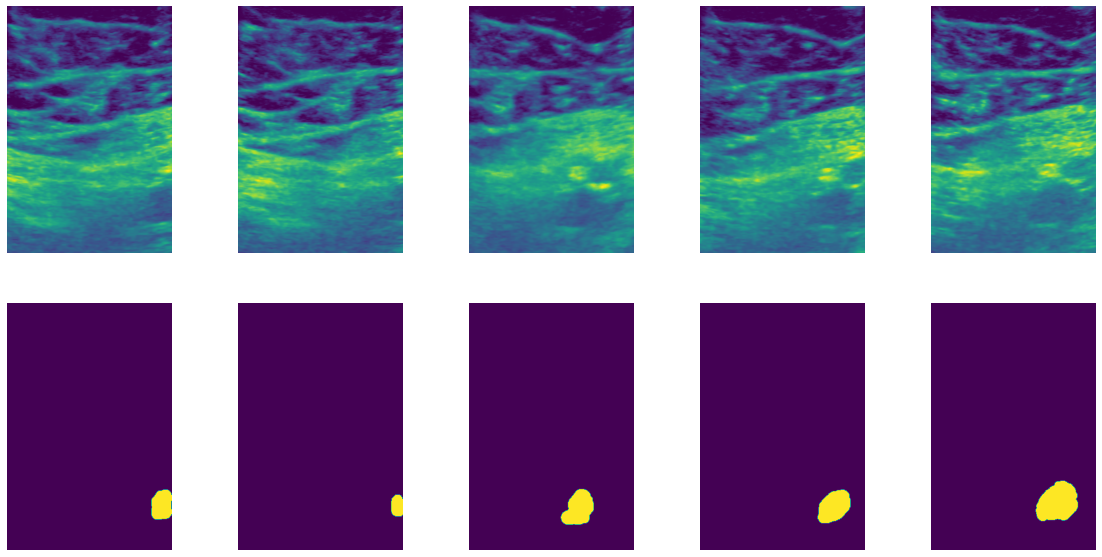

In [5]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_image(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats(20)


         364654 function calls (359483 primitive calls) in 3.741 seconds

   Ordered by: internal time
   List reduced from 1038 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      119    2.436    0.020    2.436    0.020 {method 'acquire' of '_thread.lock' objects}
        4    0.518    0.129    0.518    0.129 {built-in method posix.fork}
        4    0.202    0.051    0.202    0.051 {method 'poll' of 'select.poll' objects}
       14    0.198    0.014    0.198    0.014 {built-in method scipy.ndimage._nd_image.geometric_transform}
       28    0.041    0.001    0.041    0.001 {built-in method scipy.ndimage._nd_image.spline_filter1d}
       34    0.036    0.001    0.036    0.001 {built-in method torch._C._cuda_getDeviceCount}
     1486    0.008    0.000    0.009    0.000 /data/aylward/venv_argus/lib/python3.9/site-packages/matplotlib/transforms.py:207(set_children)
     2004    0.008    0.000    0.035    0.000 /data/aylward/venv_ar

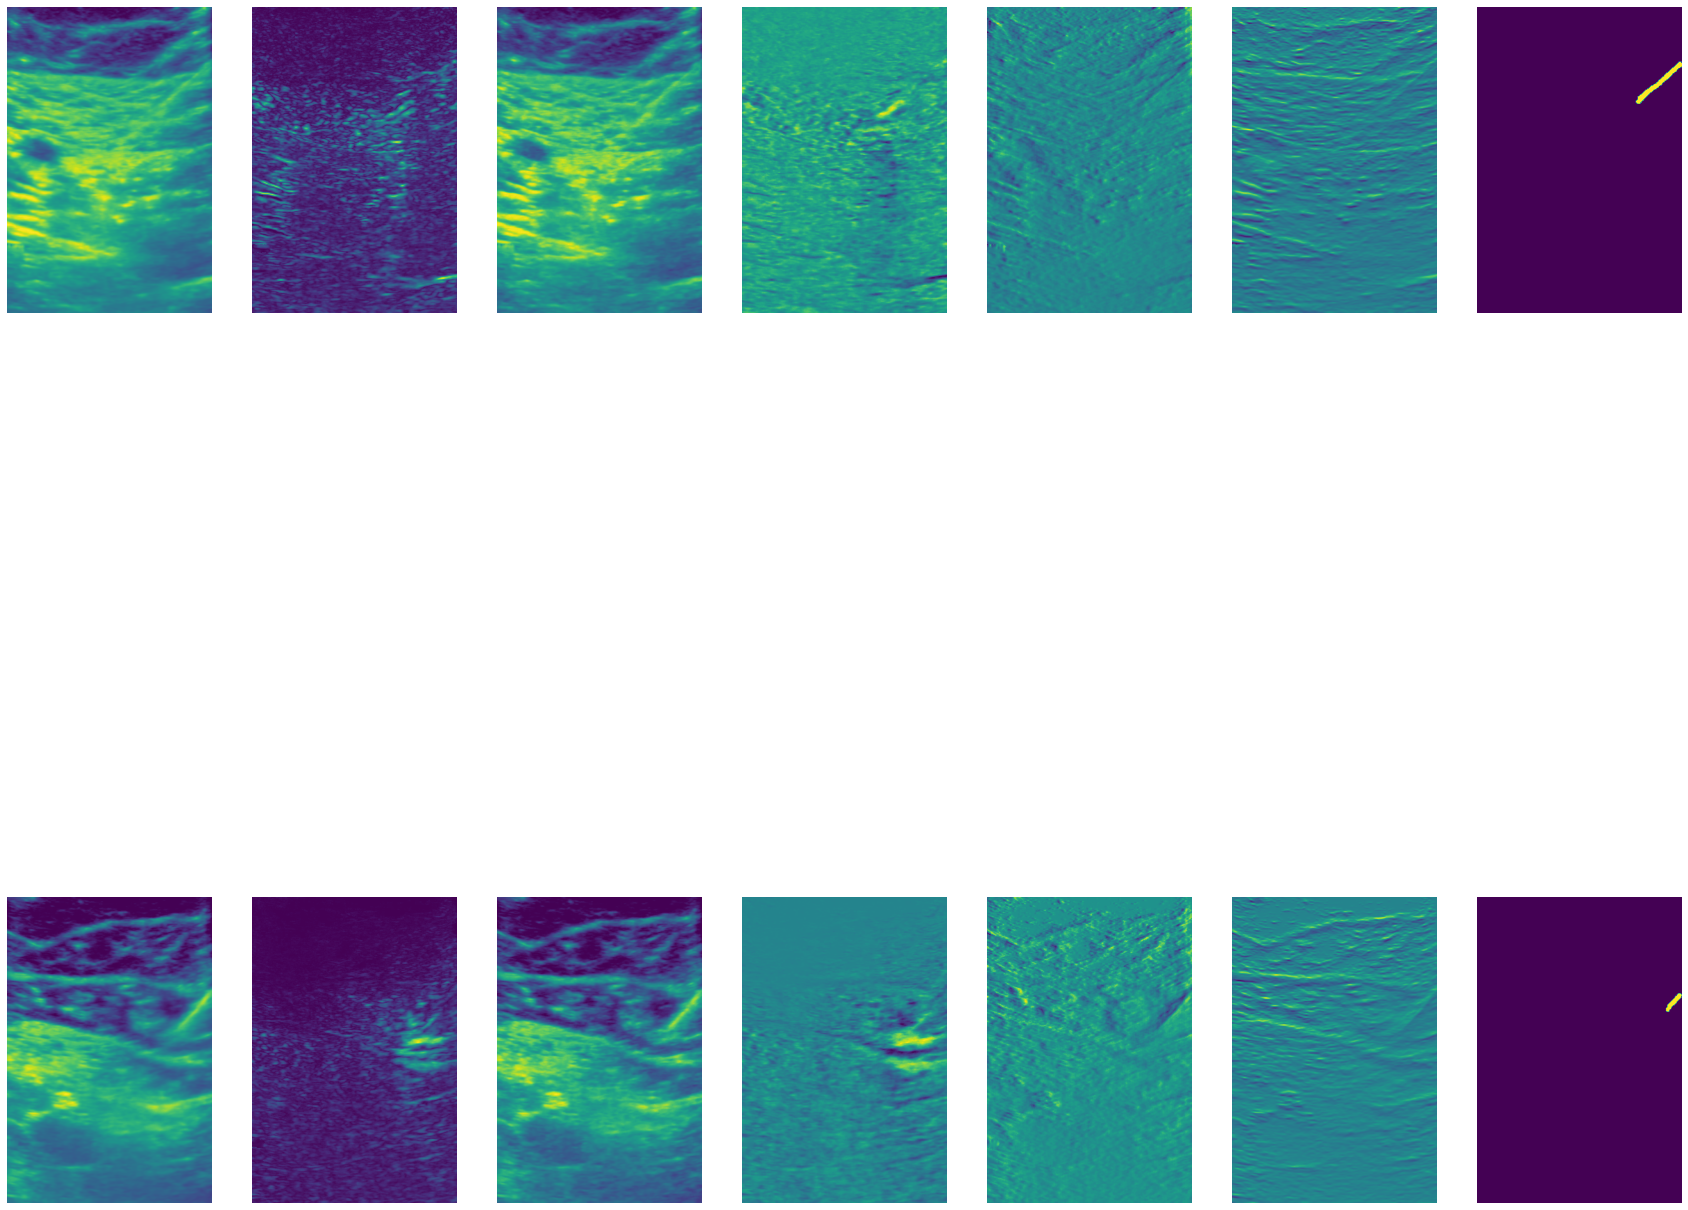

In [6]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_vfold_batch(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(40)


In [7]:
profiler = cProfile.Profile()
profiler.enable()
nnet.max_epochs = 5
nnet.train_vfold(run_num,device_num)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(100)


----------
0: epoch 1/5
0 / 10, train_loss: 0.6591
1 / 10, train_loss: 0.6501
2 / 10, train_loss: 0.6504
3 / 10, train_loss: 0.6514
4 / 10, train_loss: 0.6507
5 / 10, train_loss: 0.6452
6 / 10, train_loss: 0.6479
7 / 10, train_loss: 0.6470
8 / 10, train_loss: 0.6483
9 / 10, train_loss: 0.6385
0 epoch 1 average loss: 0.6489
----------
0: epoch 2/5
0 / 10, train_loss: 0.6453
1 / 10, train_loss: 0.6466
2 / 10, train_loss: 0.6361
3 / 10, train_loss: 0.6448
4 / 10, train_loss: 0.6440
5 / 10, train_loss: 0.6305
6 / 10, train_loss: 0.6390
7 / 10, train_loss: 0.6413
8 / 10, train_loss: 0.6291
9 / 10, train_loss: 0.6397
0 epoch 2 average loss: 0.6396
----------
0: epoch 3/5
0 / 10, train_loss: 0.6383
1 / 10, train_loss: 0.6403
2 / 10, train_loss: 0.6333
3 / 10, train_loss: 0.6356
4 / 10, train_loss: 0.6369
5 / 10, train_loss: 0.6348
6 / 10, train_loss: 0.6357
7 / 10, train_loss: 0.6316
8 / 10, train_loss: 0.6191
9 / 10, train_loss: 0.6332
0 epoch 3 average loss: 0.6339
----------
0: epoch 4/5
0